## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from scipy import stats

## Loading File

In [2]:
df = pd.read_csv('insurance.csv')

## Copying dataset

In [3]:
dfc=df.copy()

## Analysing and Visualizing dataset

In [4]:
dfc

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
#Dropping duplicate rows
dfc.drop_duplicates(inplace=True)

In [6]:
dfc = dfc.loc[dfc['charges']>=0]
dfc = dfc.loc[dfc['children']>=0]

* since charges & children cannot be negative so we will select only those rows which do not have negative values.

In [7]:
dfc = dfc.loc[dfc['age']>0]

* Also age cannot be negative and zero so we will select only those rows which do not has negative or zero value of age. 

In [8]:
dfc.shape

(1337, 7)

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
dfc.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
for i in dfc.columns:
    print('Unique values in {} are {}'.format(i,len(dfc[i].unique())))

Unique values in age are 47
Unique values in sex are 2
Unique values in bmi are 548
Unique values in children are 6
Unique values in smoker are 2
Unique values in region are 4
Unique values in charges are 1337


In [12]:
dfc.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [13]:
dfc.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [14]:
dfc.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [15]:
dfc.region.value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

#### visualisation of count of categorical columns.

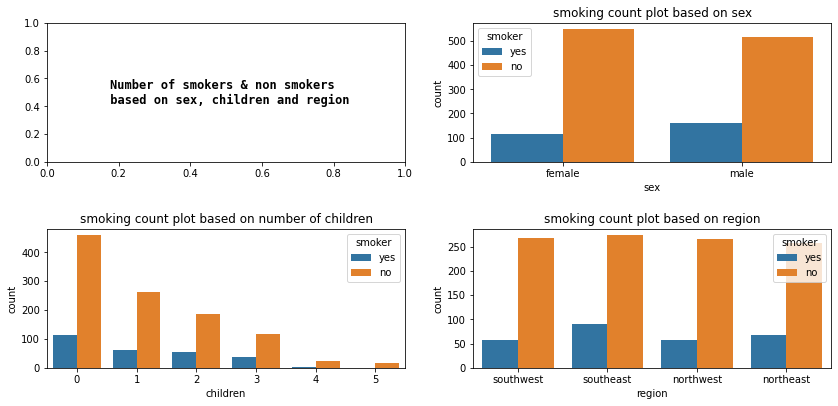

In [16]:
fig,axes = plt.subplots(2,2,figsize=(12,6))
axes[0,0].text(0.5,0.5,s='Number of smokers & non smokers \n based on sex, children and region',horizontalalignment='center',
               verticalalignment='center',fontsize=12, fontweight='bold',fontfamily='monospace',color="#000000")
axes[0,1].set_title('smoking count plot based on sex')
sns.countplot(x='sex',hue='smoker', data=dfc, ax=axes[0,1]);
axes[1,0].set_title('smoking count plot based on number of children')
sns.countplot(x='children',hue='smoker', data=dfc, ax=axes[1,0]);
axes[1,1].set_title('smoking count plot based on region')
sns.countplot(x='region',hue='smoker', data=dfc, ax=axes[1,1]);
plt.tight_layout(pad=2);

**INSIGHTS:**

* Majority of people smoke less.
* we have more smokers from male category and those who does not have any child.
* People belonging to southeast smokes more in comparison to others.

**ECDF(empirical cummulative distribution functions) :** 

An ECDF represents the proportion or count of observations falling below each unique value in a dataset. Compared to a histogram or density plot, it has the advantage that each observation is visualized directly, meaning that there are no binning or smoothing parameters that need to be adjusted. It also aids direct comparisons between multiple distributions. 

<AxesSubplot:xlabel='charges', ylabel='Proportion'>

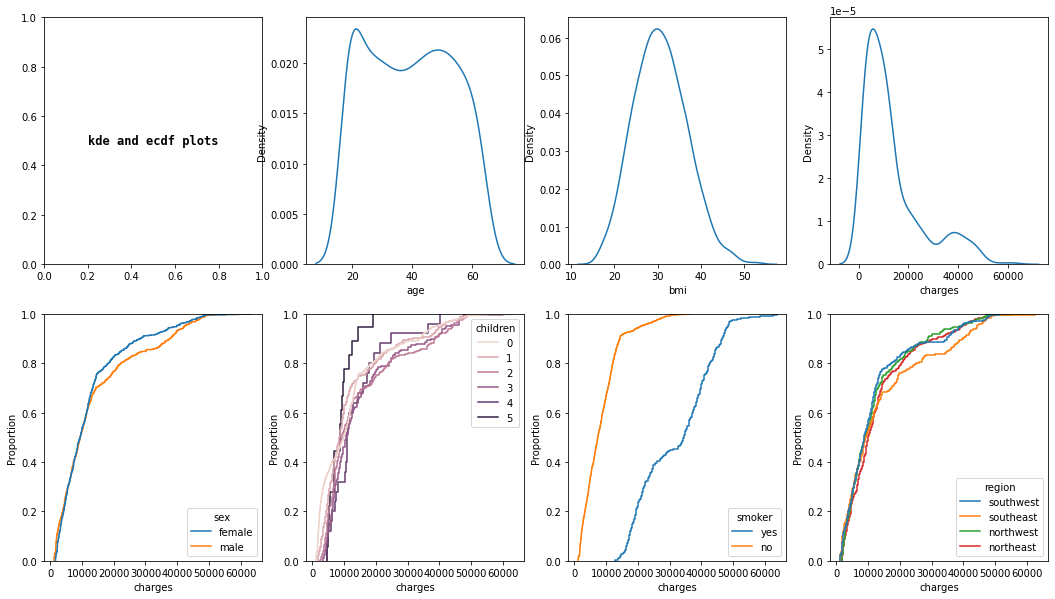

In [17]:
#def setup(title,ax):
    
fig,axes = plt.subplots(2,4,figsize=(18,10)) 

axes[0,0].text(0.5,0.5,s='kde and ecdf plots',horizontalalignment='center',verticalalignment='center',
               fontsize=12, fontweight='bold',fontfamily='monospace',color="#000000")
#axes[0,0].set_facecolor("#00000")
sns.kdeplot(data=dfc,x='age',ax=axes[0,1])
sns.kdeplot(data=dfc,x='bmi',ax=axes[0,2])
sns.kdeplot(data=dfc,x='charges',ax=axes[0,3])

sns.ecdfplot(data=dfc, x='charges',hue='sex',ax=axes[1,0])
sns.ecdfplot(data=dfc, x='charges',hue='children',ax=axes[1,1])
sns.ecdfplot(data=dfc, x='charges',hue='smoker',ax=axes[1,2])
sns.ecdfplot(data=dfc, x='charges',hue='region',ax=axes[1,3])

INSIGHTS:
* Charges distribution is positively skewed.
* Non smoker has less insurance charges.

#### Visualising Outliers

<AxesSubplot:title={'center':'children vs Charges'}, xlabel='children', ylabel='charges'>

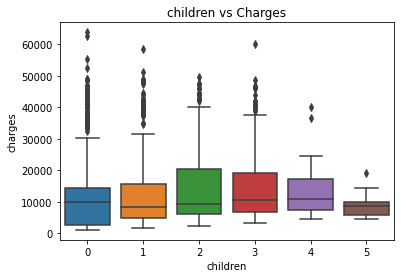

In [18]:
plt.title('children vs Charges')
sns.boxplot(x='children',y='charges',data=dfc)

<AxesSubplot:title={'center':'Smoker vs Charges'}, xlabel='smoker', ylabel='charges'>

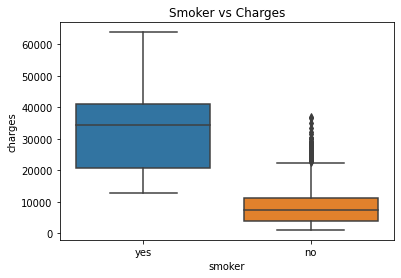

In [19]:
plt.title('Smoker vs Charges')
sns.boxplot(x='smoker',y='charges',data=dfc)

* Black points indicate the outliers.

#### Visulaisation of continuous columns

<AxesSubplot:xlabel='charges', ylabel='bmi'>

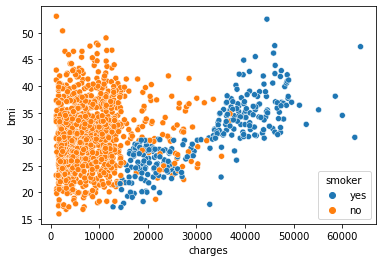

In [20]:
sns.scatterplot(x='charges',y='bmi',hue='smoker',data=dfc)

* Those who smoke and has high bmi have more insurance charges.
* Insurance charges for non smokers are not affecting with increasing in BMI.

<AxesSubplot:xlabel='charges', ylabel='age'>

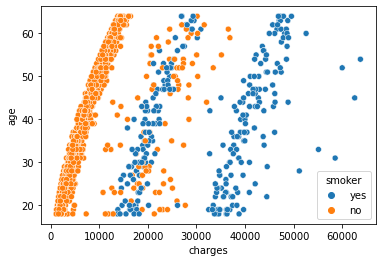

In [21]:
sns.scatterplot(x='charges',y='age',hue='smoker',data=dfc)

**Insights**:
* As the age increases the insurance charges also increases.
* Those who smoke and are older has to pay approximately four times insurance charges to that of a non-smoker.
    

#### Regression Line results of insurance charges v/s age and bmi on the basis of Smoking

In [22]:
smokers = dfc.loc[dfc['smoker'] =='yes']
non_smokers = dfc.loc[dfc['smoker'] =='no']

reg_smokers_age = stats.linregress(smokers['age'],smokers['charges'])
print('Result for smokers based on age:\n',reg_smokers_age)
print('\n')
reg_non_smokers_age = stats.linregress(non_smokers['age'],non_smokers['charges'])
print('Result for non-smokers based on age:\n',reg_non_smokers_age)
print('\n')
print('- '*60)
print('\n')
reg_smokers_bmi = stats.linregress(smokers['bmi'],smokers['charges'])
print('Result for smokers based on BMI:\n',reg_smokers_bmi)
print('\n')
reg_non_smokers_bmi = stats.linregress(non_smokers['bmi'],non_smokers['charges'])
print('Result for non-smokers based on BMI:\n',reg_non_smokers_bmi)


Result for smokers based on age:
 LinregressResult(slope=305.2376021098289, intercept=20294.128126915966, rvalue=0.36822444373077773, pvalue=3.180585226548615e-10, stderr=46.730566757174735, intercept_stderr=1913.399532084221)


Result for non-smokers based on age:
 LinregressResult(slope=267.1183196153645, intercept=-2085.007665013898, rvalue=0.6274002231304532, pvalue=2.1516243227080044e-117, stderr=10.17817219632033, intercept_stderr=425.8646230271765)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Result for smokers based on BMI:
 LinregressResult(slope=1473.10625470142, intercept=-13186.576322762925, rvalue=0.8064806070155403, pvalue=5.019668631796339e-64, stderr=65.48390823741201, intercept_stderr=2052.884891439847)


Result for non-smokers based on BMI:
 LinregressResult(slope=83.33973960253213, intercept=5886.14283869131, rvalue=0.08407651699889862, pvalue=0.00609110347805546, stderr=30.32349815254274

**Insights**:
* Smokers has to pay an increase amount by 305.24 dollars every year as they get older
  while non-smokers has to pay an increase by 267.12 dollars. 
* BMI is highly affecting the increase of insurance charges by 1473.11 dollars to smokers. 

In [23]:
dfc = pd.get_dummies(dfc,columns=['sex','smoker'],drop_first=True)

In [24]:
le = LabelEncoder()
dfc['region'] = le.fit_transform(dfc['region'])
dfc

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,3,16884.92400,0,1
1,18,33.770,1,2,1725.55230,1,0
2,28,33.000,3,2,4449.46200,1,0
3,33,22.705,0,1,21984.47061,1,0
4,32,28.880,0,1,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,1,0
1334,18,31.920,0,0,2205.98080,0,0
1335,18,36.850,0,2,1629.83350,0,0
1336,21,25.800,0,3,2007.94500,0,0


In region column,
* 0 : northeast
* 1 : northwest
* 2 : southeast
* 3 : southwest

<AxesSubplot:>

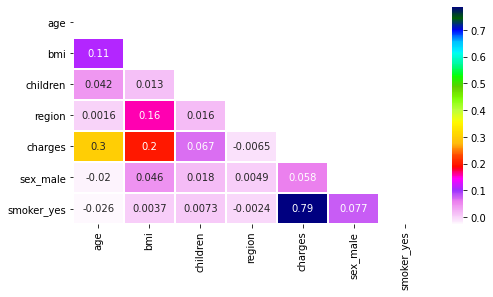

In [25]:
plt.figure(figsize=(8,4))
mask =  np.triu(np.ones_like(dfc.corr()))
sns.heatmap(dfc.corr(),mask=mask,annot=True,cmap='gist_ncar_r',linewidth=0.2)

* Charges is highly correlated with smoking. 

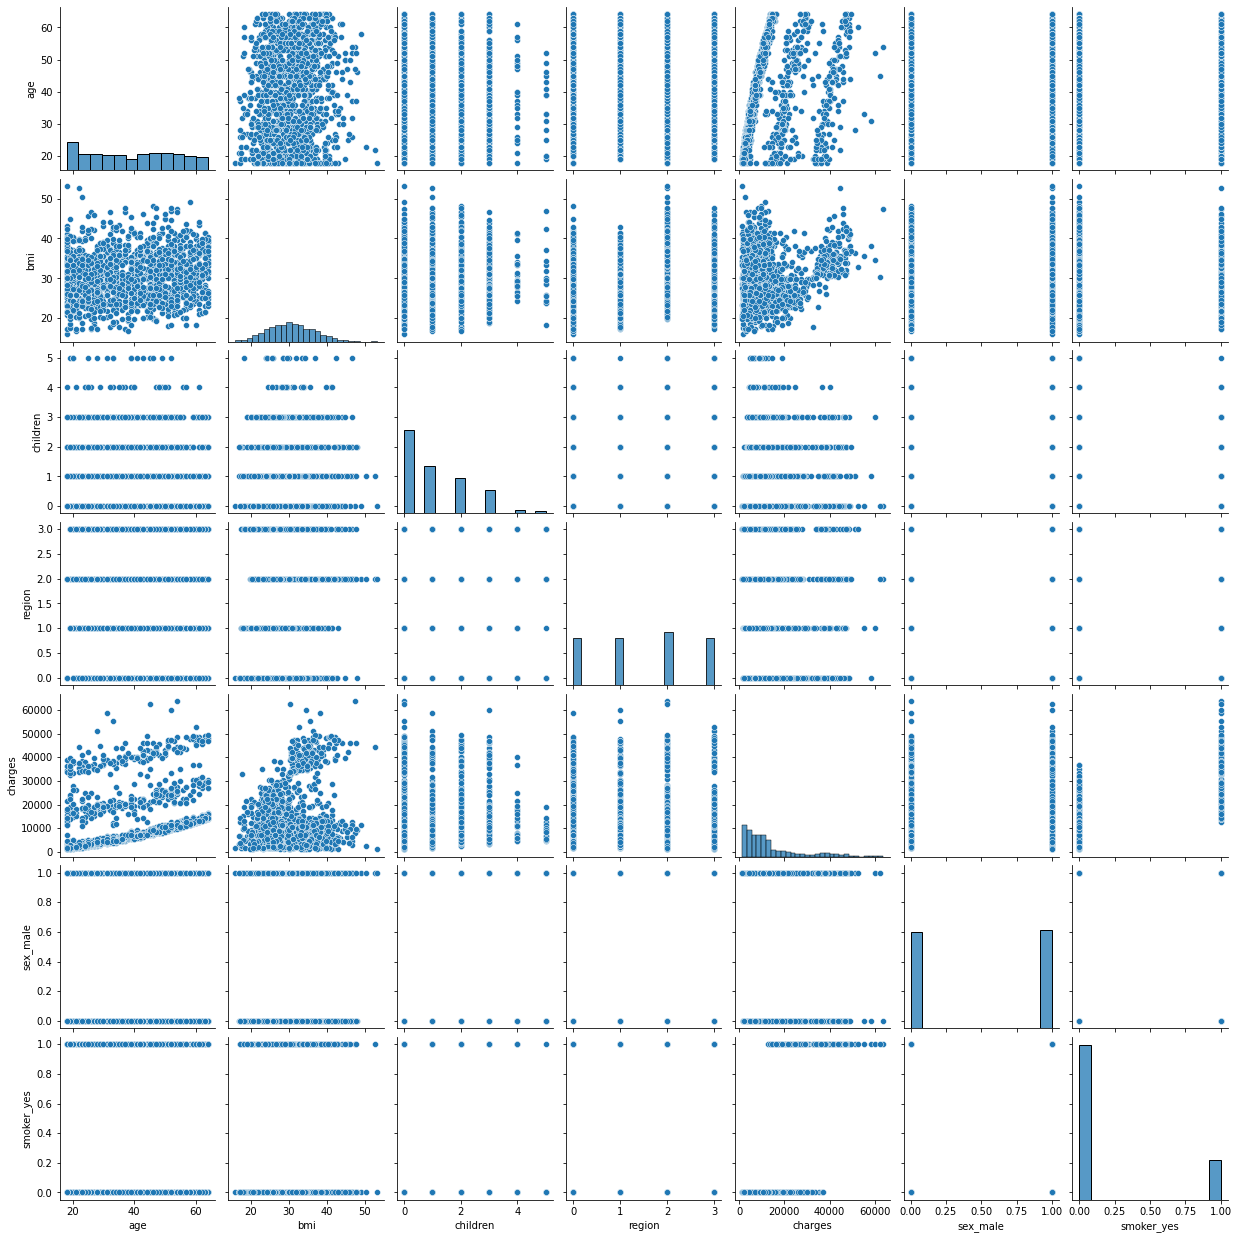

In [26]:
sns.pairplot(dfc)

In [27]:
dfc.skew()

age           0.054781
bmi           0.283914
children      0.937421
region       -0.039068
charges       1.515391
sex_male     -0.019469
smoker_yes    1.463601
dtype: float64

#### Q-Q Plot

The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations 
with a common distribution such as normal.

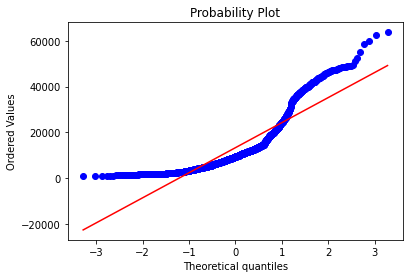

In [33]:
stats.probplot(dfc['charges'],dist='norm',plot=plt)
plt.show()

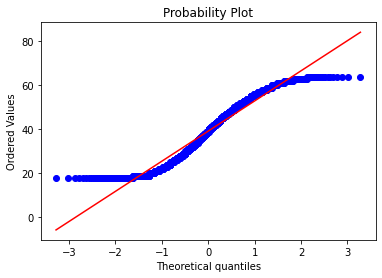

In [34]:
stats.probplot(dfc['age'],dist='norm',plot=plt)
plt.show()

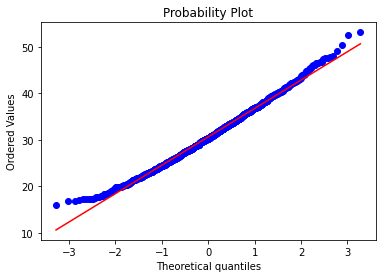

In [29]:
stats.probplot(dfc['bmi'],dist='norm',plot=plt)
plt.show()

* Charges has the highest skewness.

#### Transformation to reduce skewness OR Gaussian Transformation

NOTE: we do not use gaussean transformation in SVM, Neural Network and Tree based algorithms since they do not make any assumptions over the distribution of independent features.

In [ ]:
#charges_log = np.log(dfc['charges']+1)
#it is used so that wherever the value of charges is zero than than log(0+1) can be equal to 0.

#dfc['charges'] = np.log(dfc['charges'])
#dfc['charges'].skew()
#smoker_yes_log = np.log(dfc['smoker_yes'])  #categorical columns needs no skewness transformation
#smoker_yes_log.skew()

In [ ]:
#stats.probplot(dfc['charges'],dist='norm',plot=plt)
#plt.show()

In [ ]:
#dfc['charges_sqrt'] = np.sqrt(dfc['charges'])
#dfc['charges_sqrt'].skew()

In [ ]:
#stats.probplot(dfc['charges_sqrt'],dist='norm',plot=plt)
#plt.show()

In [35]:
# Boxcox transform is given by The Box-Cox transform is given by:

#y = (x**lmbda - 1) / lmbda,  for lmbda != 0
#    log(x),                  for lmbda = 0


dfc['charges_boxcox'] = stats.boxcox(dfc['charges'])[0]
print(pd.Series(dfc['charges_boxcox']).skew())

-0.008674297022526162


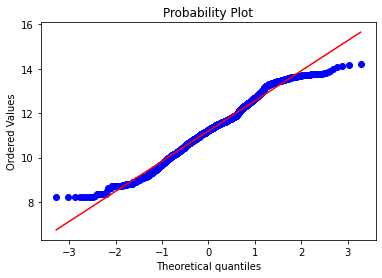

In [36]:
stats.probplot(dfc['charges_boxcox'],dist='norm',plot=plt)
plt.show()

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler       ##to use normalisation use MinMaxScaler

In [38]:
sd =StandardScaler()
col_to_be_std = ['age','bmi']
dfc[col_to_be_std]= sd.fit_transform(dfc[col_to_be_std])

In [39]:
dfc

,age,bmi,children,region,charges,sex_male,smoker_yes,charges_boxcox
0,-1.440418,-0.453160,0,3,16884.92400,0,1,12.120634
1,-1.511647,0.509422,1,2,1725.55230,1,0,8.804026
2,-0.799350,0.383155,3,2,4449.46200,1,0,10.141549
3,-0.443201,-1.305052,0,1,21984.47061,1,0,12.526076
4,-0.514431,-0.292456,0,1,3866.85520,1,0,9.939887
...,...,...,...,...,...,...,...,...
1333,0.767704,0.050269,3,1,10600.54830,1,0,11.416735
1334,-1.511647,0.206053,0,0,2205.98080,0,0,9.145579
1335,-1.511647,1.014490,0,2,1629.83350,0,0,8.725190
1336,-1.297958,-0.797524,0,3,2007.94500,0,0,9.014352


### Splitting Train Test Data

In [40]:
x=dfc.drop(['charges','charges_boxcox'],axis=1)
y=dfc['charges_boxcox']   
y1=dfc['charges']      #for AdaBoost because it is tree based algorithm in which transformation is not used.
from sklearn.model_selection import train_test_split
#splitting data for other algorithms
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#splitting data for AdaBoost
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y1,test_size=0.2,random_state=0)  

### Linear regression without using GridSearchCV

In [41]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [42]:
lr.fit(x_train,y_train)
pred_wog = lr.predict(x_test)
from sklearn import metrics

def get_bias(predicted_values,true_values):
    return np.round(np.mean((predicted_values - true_values)**2),0)
bias_wog = get_bias(pred_wog,y_test)
print('Bias without using GridSearchCV in linear regression:',bias_wog)


print('Variance without using GridSearchCV in linear regression:',np.round(np.var(pred_wog),0))
print('RMSE without using GridSearchCV in linear regression:',np.sqrt(metrics.mean_squared_error(y_test,pred_wog)))
print('LRwog model score:',lr.score(x_test,y_test))

Bias without using GridSearchCV in linear regression: 0.0
Variance without using GridSearchCV in linear regression: 1.0
RMSE without using GridSearchCV in linear regression: 0.6711538525152219
LRwog model score: 0.773770956744094


### Linear Regression with using GridSearchCV

In [84]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True], 'normalize':[False], 'copy_X':[False]}
lrg=GridSearchCV(lr,parameters,cv=5)
lrg.fit(x_train,y_train)
pred = lrg.predict(x_test)
print(lrg.best_score_)

0.7655514533538297


In [54]:
bias = get_bias(pred,y_test)
print('Bias of Linear Regression Model using gridSearchCV:',bias)


print('Variance of Linear Regression Model using gridSearchCV:',np.round(np.var(pred),0))
print('RMSE of Linear Regression Model using gridSearchCV',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('LRwg Model Score:',lrg.score(x_test,y_test))

Bias of Linear Regression Model using gridSearchCV: 0.0
Variance of Linear Regression Model using gridSearchCV: 1.0
RMSE of Linear Regression Model using gridSearchCV 0.6711538525152219
LRwg Model Score: 0.773770956744094


### Ridge

In [55]:
from sklearn.linear_model import Ridge
rid = Ridge()
params = {'alpha':[1e-15,1e-14,1e-13,0,1,5,10,15]}
ridge_reg = GridSearchCV(rid,params,scoring='neg_mean_squared_error',cv=10)
ridge_reg.fit(x_train,y_train)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)
pred_ridge = ridge_reg.predict(x_test)

{'alpha': 1e-15}
-0.4291947355738495


* negative sign in score is due to negative mean squared error in scoring 

In [56]:
bias_ridge = get_bias(pred_ridge,y_test)
print('Bias using Ridge:',bias_ridge)


print('Variance using Ridge:',np.round(np.var(pred_ridge),0))
print('RMSE using Ridge:',np.sqrt(metrics.mean_squared_error(y_test,pred_ridge)))
print('Ridge Model Score:',ridge_reg.score(x_test,y_test))

Bias using Ridge: 0.0
Variance using Ridge: 1.0
RMSE using Ridge: 0.6711538525152217
Ridge Model Score: -0.45044749374602405


### Lasso

In [57]:
from sklearn.linear_model import Lasso
las = Lasso()
param = {'alpha':[1e-15,1e-14,1e-13,0,1,5,10,15]}
lasso_reg = GridSearchCV(las,param,scoring='neg_mean_squared_error',cv=10)
lasso_reg.fit(x_train,y_train)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)
pred_lasso = lasso_reg.predict(x_test)

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.497164754747, tolerance: 0.1734771420558742
  model = cd_fast.enet_coordinate_descent(
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: User

{'alpha': 1e-13}
-0.42919473557384913


In [58]:
bias_lasso = get_bias(pred_lasso,y_test)
print('Bias using Lasso:',bias_lasso)


print('Variance using Lasso:',np.round(np.var(pred_lasso),0))
print('RMSE using Lasso:',np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)))
print('Lasso Model Score:',lasso_reg.score(x_test,y_test))

Bias using Lasso: 0.0
Variance using Lasso: 1.0
RMSE using Lasso: 0.6711538525152473
Lasso Model Score: -0.45044749374605825


## AdaBoost

In [79]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
base_models = RandomForestRegressor(n_estimators =30,criterion= 'mse',
     max_features = 'auto',min_samples_split =2,random_state = 40)
ad = AdaBoostRegressor(base_models)
tuned_parameters = [{'loss' : ['linear'],'random_state' : [47],'learning_rate' : [1]}]
adg = GridSearchCV(ad,tuned_parameters,cv=10)

In [80]:
adg.fit(x1_train,y1_train)
pred_ada = adg.predict(x1_test)

In [81]:
bias_ada = get_bias(pred_ada,y1_test)
print('Bias using AdaBoost:',bias_ada)


print('Variance using AdaBoost:',np.round(np.var(pred_ada),0))
print('RMSE using AdaBoost:',np.sqrt(metrics.mean_squared_error(y1_test,pred_ada)))
print('AdaBoost Model Score:',adg.score(x1_test,y1_test))

Bias using AdaBoost: 29257552.0
Variance using AdaBoost: 137374654.0
RMSE using AdaBoost: 5409.025022737843
AdaBoost Model Score: 0.8260855554503301


### Regression Plots of Models

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

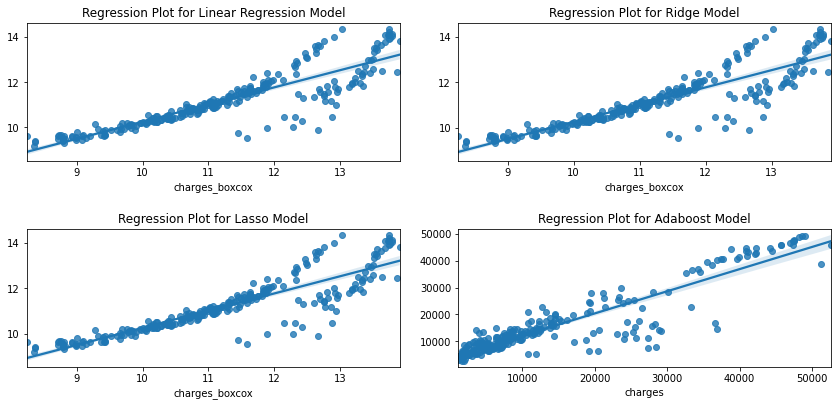

In [82]:
fig,axes = plt.subplots(2,2,figsize=(12,6))
axes[0,0].set_title('Regression Plot for Linear Regression Model')
sns.regplot(y_test,pred,ax=axes[0,0])
axes[0,1].set_title('Regression Plot for Ridge Model')
sns.regplot(y_test,pred_ridge, ax=axes[0,1]);
axes[1,0].set_title('Regression Plot for Lasso Model')
sns.regplot(y_test,pred_lasso, ax=axes[1,0]);
axes[1,1].set_title('Regression Plot for Adaboost Model')
sns.regplot(y1_test,pred_ada, ax=axes[1,1]);
plt.tight_layout(pad=2);

### Distribution plots of Models

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

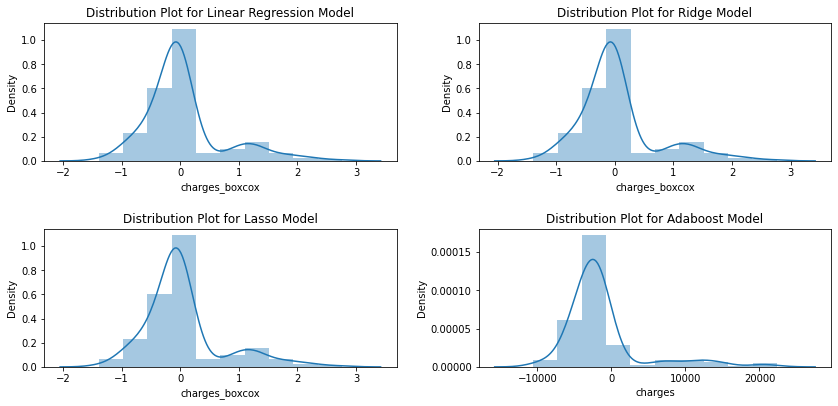

In [83]:
fig,axes = plt.subplots(2,2,figsize=(12,6))
axes[0,0].set_title('Distribution Plot for Linear Regression Model')
sns.distplot(y_test-pred,bins=10,ax=axes[0,0])
axes[0,1].set_title('Distribution Plot for Ridge Model')
sns.distplot(y_test-pred_ridge,bins=10,ax=axes[0,1]);
axes[1,0].set_title('Distribution Plot for Lasso Model')
sns.distplot(y_test-pred_lasso,bins=10,ax=axes[1,0]);
axes[1,1].set_title('Distribution Plot for Adaboost Model')
sns.distplot(y1_test-pred_ada,bins=10,ax=axes[1,1]);
plt.tight_layout(pad=2);

**Conclusion**:

* Adaboost model has shown the best accuracy of 0.826 